### Part 2

Showing another way of data preparation and changing the type of data, as well as using seaborn , matplotlib and yellowbrick for visualization.

In [30]:
import numpy as np
import pandas as pd

from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns



In [39]:
# since I got the data from Kaggle there is an error utf-8 to handle, so it had to be downgraded to latin-1
df = pd.read_csv('./Data/SuperStore_Orders.csv', encoding='latin-1')

#changing data type for sales to integers
df.sales.replace('\D', '', regex=True, inplace=True)
df['sales'] = df['sales'].astype('int64')
df['profit'] = df['profit'].astype('int64')

#years to objects since datetime is not relevant to our analysis
df['year'] = df['year'].astype('object')
df.info()

#no null values in this dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  int64  
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [40]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37,4.70,Medium,2011


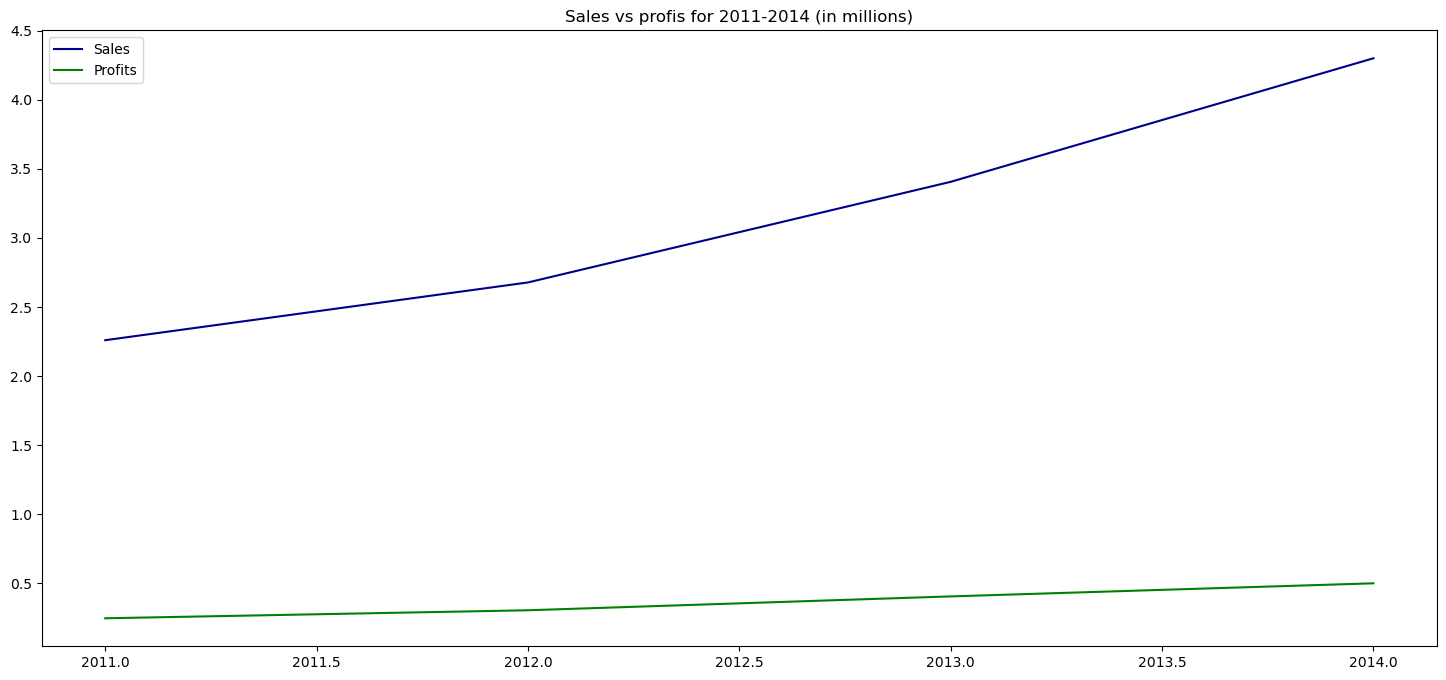

In [41]:
#Yearly Sales and Profit

sales_ann = df.groupby('year')['sales'].sum().reset_index()
profit_ann = df.groupby('year')['profit'].sum().reset_index()

plt.figure(figsize=[18,8])
plt.title("Sales vs profis for 2011-2014 (in millions)")
plt.plot(sales_ann['year'], sales_ann['sales'] /1000000, color='darkblue')
plt.plot(profit_ann['year'], profit_ann['profit'] / 1000000, color='green')
plt.legend(['Sales', 'Profits'])
plt.show()

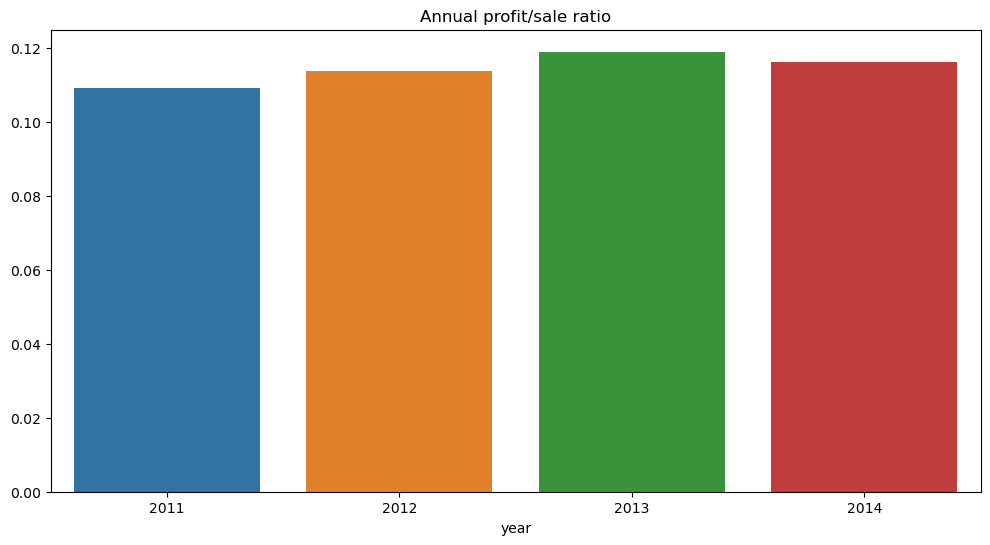

In [42]:
prof_by_sale = profit_ann['profit'] / sales_ann['sales']

plt.figure(figsize=[12,6])
sns.barplot(y=prof_by_sale, x=sales_ann['year'])
plt.title("Annual profit/sale ratio")
plt.show()

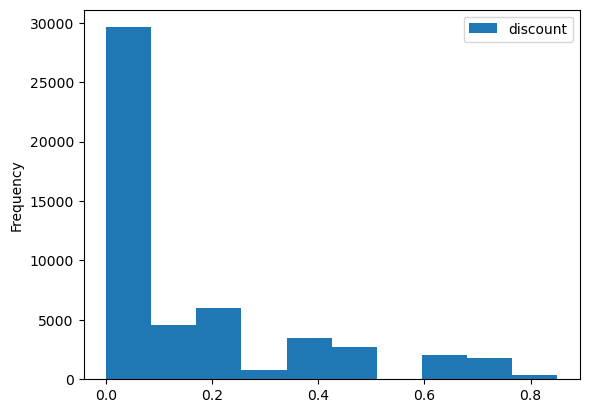

In [43]:
# Profit and discount

df.plot.hist(x='profit', y=['discount'])
plt.show()

In [44]:
profile = ProfileReport(df=df, title="Store Profile2")

In [45]:
# profile.to_notebook_iframe()

profile.to_file("./Data/SuperStore_pen2_pro.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]